##  TensorFlow
Duration: 0:30

[TensorFlow](https://www.tensorflow.org/) es una libreria especializada en aprendizaje de maquina.


### Que vamos a hacer

En este laboratorio vamos a usarla para crear una aplicacion que identifique objetos  a partir de imagenes. 
>![alt text](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/img/3021186b83bc90c2.png)

  ```
  Evaluation time (1-image): 0.110s

  daisy (score=0.99712)
  tulips (score=0.00286)
  dandelion (score=0.00001)
  roses (score=0.00001)
  sunflowers (score=0.00000)
  ```

### What you'll Learn
* Como usar Colaboratory con Python y TensorFlow para entrenar un clasificador de imagenes
* Como clasificar imagens con el algoritmo entrenado

## Configuracion
Duration: 0:30

### Instalar TensorFLow

Vamos a utilzar Colaboratory porque la configuracion del ecosistema de programacion, incluyendo la libreria `tensorflow` y el acceso a un procesador grafico GPU no requieren de ninguna configuracion avanzada. La libreria `tensorflow` esta disponible en el sistema de Colaboratory

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


### Clonar el repositorio

El codigo que se va a utilzar en este y el siguiente laboratorio esta en el siguiente repositorio. Clona el repositorio y una vez hecho, cambia la ruta a ese directorio, que es en el cual estaremos trabajando.

In [2]:
!git clone https://github.com/htapiagroup/tensorflow-for-lania

Cloning into 'tensorflow-for-lania'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 59.91 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [3]:
cd tensorflow-for-lania/

/content/tensorflow-for-lania


Antes de entrenar un modelo, necesitamos datos con las categorias que quisieramos que el modelo pudiera identificar. El siguiente comando descarga una base de datos con imagenes de flores.

In [5]:
!curl http://download.tensorflow.org/example_images/flower_photos.tgz \
    | tar xz -C tf_files

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  37.9M      0  0:00:05  0:00:05 --:--:-- 50.3M


In [8]:
ls tf_files/flower_photos

daisy/  dandelion/  LICENSE.txt  roses/  sunflowers/  tulips/


## (Re)entrenando la red neuronal
Duration: 5:00

### Configura MobileNet
En este laboratorio usaremos [MobileNet](https://research.googleblog.com/2017/06/mobilenets-open-source-models-for.html), una red neuronal ligera y eficiente. Esta red puede configurarse de dos formas:

* Resolucion de la imagen de entrada: Si las imagenes que alimentan al modelo son de mayor resolucion, necesitamos mayor poder de procesamiento y el modelo clasifica con mayor exactitud
* Tamaño relativo del modelo: 1.0, 0.75, 0.50 o 0.25.

Vamos a usar 224 y 0.50 para este laboratorio. 

In [0]:
%%bash
 
IMAGE_SIZE=224
ARCHITECTURE="mobilenet_0.50_${IMAGE_SIZE}"

python -m scripts.retrain \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=500 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/"${ARCHITECTURE}" \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture="${ARCHITECTURE}" \
  --image_dir=tf_files/flower_photos

Este paso puede demorar varios minutos.

El script descarga un modelo pre-entrenado, agrega una nueva capa final y entrena esta capa en el conjunto de entrenamiento de las imagenes que descargaste previamente.

El modelo que acabamos de usar no tiene ninguna de las especies de flores que hemos especificado. Sin embargo, la informacion que hace posible que el modelo pueda distinguir entre 1000 clases de objetos puede usarse para nuestros propositos. Toda esta informacion es usada inicialmente para alimentar una red neuronal cuya ultima capa de clasificacion distingue entre las clases de flores.

## Usando el nuevo modelo
Duration: 5:00

El script de reentrenamiento guarda los datos en los siguientes archivos:
  * `tf_files/retrained_graph.pb`, que contiene una version de la red neuronal con la capa final reentrenada usando las nuevas categorias,
  * `tf_files/retrained_labels.txt`, un archivo de texto que contiene las etiquetas

## Clasificando una imagen
Duration: 2:00

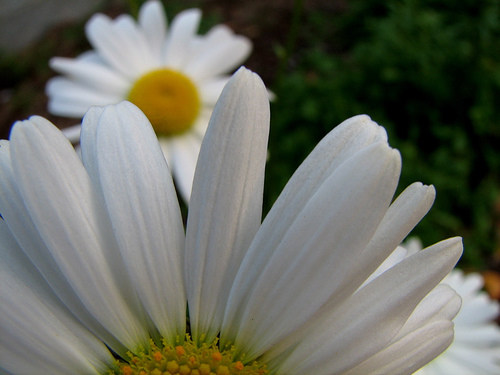

In [27]:
#@markdown En el directorio `scripts` hay un codigo que puede usarse para probar el modelo con la instruccion que sigue
from IPython.display import YouTubeVideo, display
from IPython.display import Image
display(Image(filename="tf_files/flower_photos/daisy/301964511_fab84ea1c1.jpg",  width=224, height=170))

In [19]:
%run scripts/label_image.py \
 --graph=tf_files/retrained_graph.pb  \
 --image=tf_files/flower_photos/daisy/301964511_fab84ea1c1.jpg



Evaluation time (1-image): 0.174s

daisy (score=0.99732)
tulips (score=0.00268)
sunflowers (score=0.00000)
dandelion (score=0.00000)
roses (score=0.00000)


### Parentesis (...
Tambien puede evaluarse usando la siguiente sintaxis

In [0]:
!python -m scripts.label_image \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/daisy/301964511_fab84ea1c1.jpg

Adicionalmente la sintaxis que sigue tambien funciona

In [0]:
%%python

scripts.label_image \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/daisy/301964511_fab84ea1c1.jpg

## Ejemplos adicionales tomados del conjunto de entrenamiento
Duration: 2:00

En cada ejecucion se va a mostrar una lista de flores, en la mayoria de los casos con la flor correcta en la primera linea. En este caso el resultado indica que con un 99.017% de probabilidad, la imagen representa una flor "daisy" (margarita). Podemos usar este script cambiando la ruta del archivo en la opcion `--image` para determinar que flor hay en alguna imagen:

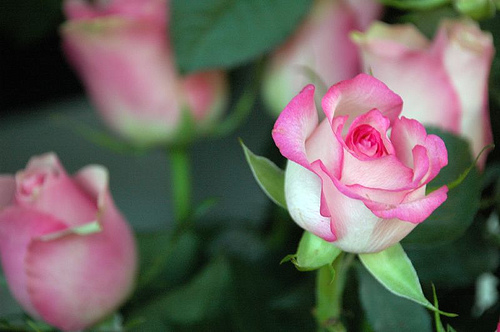


Evaluation time (1-image): 0.117s

roses (score=0.99463)
tulips (score=0.00534)
sunflowers (score=0.00002)
daisy (score=0.00001)
dandelion (score=0.00000)


In [0]:
display(Image(filename="tf_files/flower_photos/roses/2888138918_402096c7fb.jpg"))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/roses/2888138918_402096c7fb.jpg

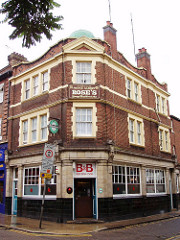


Evaluation time (1-image): 0.116s

roses (score=0.99370)
tulips (score=0.00382)
daisy (score=0.00222)
sunflowers (score=0.00023)
dandelion (score=0.00005)


In [0]:
display(Image(filename="tf_files/flower_photos/roses/2863863372_605e29c03e_m.jpg"))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/roses/2863863372_605e29c03e_m.jpg


## Probando con imagenes nuevas
Duration: 2:00

Vamos a probar usando imagenes de flores que el modelo no conoce. Para esto hacemos una busqueda rapida en 

In [0]:
!wget http://expertofdreams.com/data_images/daisy/daisy-7.jpg
  

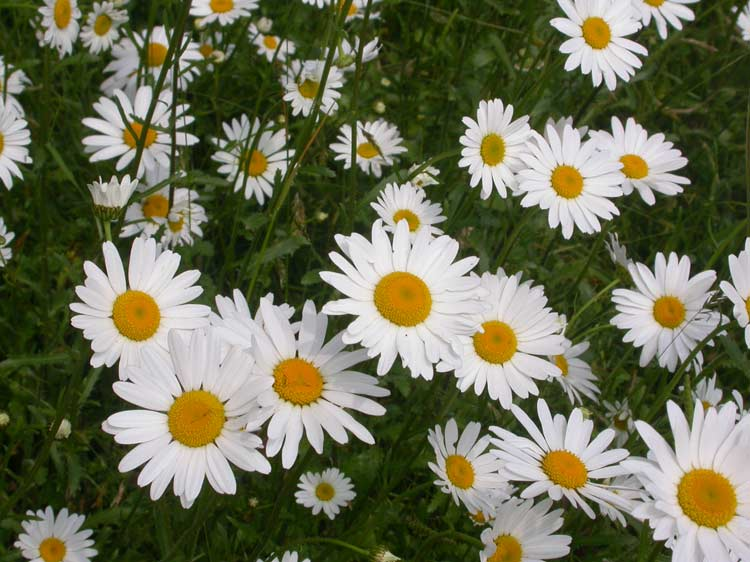


Evaluation time (1-image): 0.170s

daisy (score=0.99950)
sunflowers (score=0.00047)
tulips (score=0.00003)
roses (score=0.00000)
dandelion (score=0.00000)


In [31]:
display(Image(filename="daisy-7.jpg", width=128, height=128))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=daisy-7.jpg

--2019-03-13 16:47:23--  https://parkseed.com/images/xxl/00989-pk-p1.jpg
Resolving parkseed.com (parkseed.com)... 205.147.88.160
Connecting to parkseed.com (parkseed.com)|205.147.88.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 515685 (504K) [image/jpeg]
Saving to: ‘00989-pk-p1.jpg.2’

00989-pk-p1.jpg.2   100%[===================>] 503.60K   905KB/s    in 0.6s    

2019-03-13 16:47:25 (905 KB/s) - ‘00989-pk-p1.jpg.2’ saved [515685/515685]



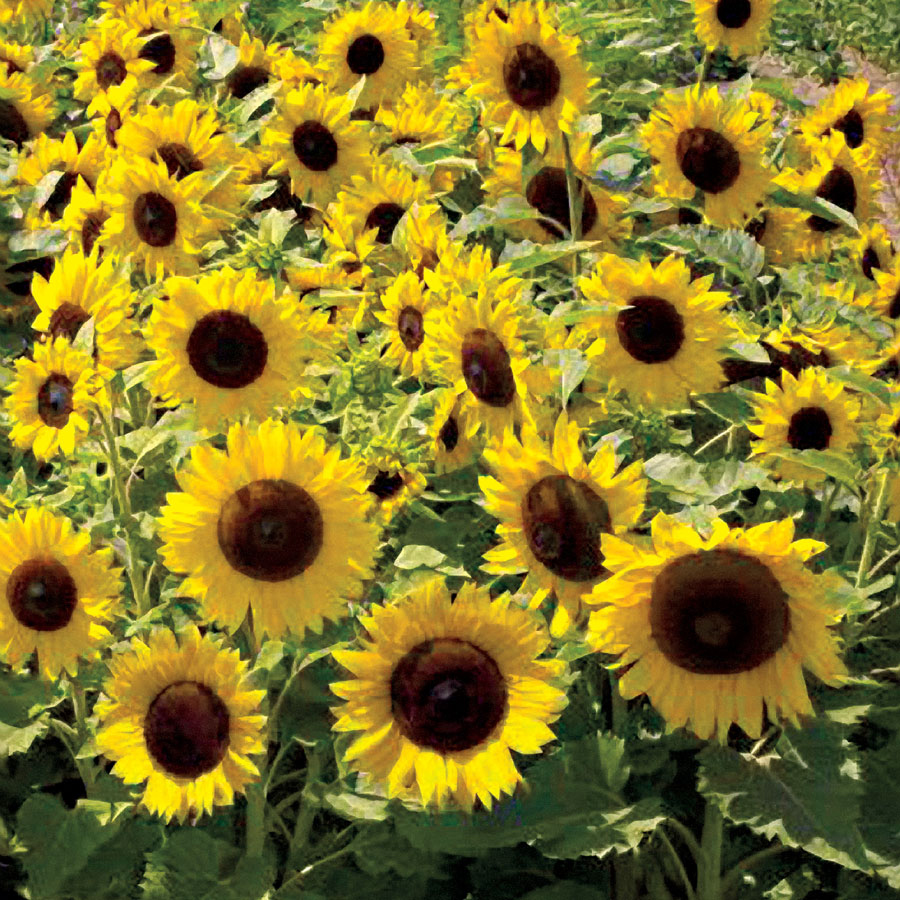


Evaluation time (1-image): 0.173s

sunflowers (score=0.99999)
dandelion (score=0.00000)
roses (score=0.00000)
daisy (score=0.00000)
tulips (score=0.00000)


In [33]:

!wget https://parkseed.com/images/xxl/00989-pk-p1.jpg

display(Image(filename="00989-pk-p1.jpg", width=128, height=128))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=00989-pk-p1.jpg


--2019-03-13 16:47:45--  http://barmac.com.au/wp-content/uploads/sites/3/2016/01/dandelion.jpg
Resolving barmac.com.au (barmac.com.au)... 110.173.158.130
Connecting to barmac.com.au (barmac.com.au)|110.173.158.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73936 (72K) [image/jpeg]
Saving to: ‘dandelion.jpg.1’

dandelion.jpg.1     100%[===================>]  72.20K   171KB/s    in 0.4s    

2019-03-13 16:47:45 (171 KB/s) - ‘dandelion.jpg.1’ saved [73936/73936]



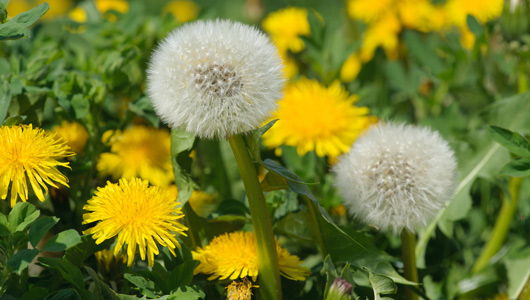


Evaluation time (1-image): 0.167s

dandelion (score=0.99750)
sunflowers (score=0.00211)
daisy (score=0.00039)
tulips (score=0.00000)
roses (score=0.00000)


In [34]:
!wget http://barmac.com.au/wp-content/uploads/sites/3/2016/01/dandelion.jpg


display(Image(filename="dandelion.jpg", width=128, height=128))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=dandelion.jpg


## Retroalimentación
Duration: 1:00

Survey
: TensorFlow es una libreria
 - para calculos numericos de matrices aleatorias
 - para calculos numericos especilizada en aprendizaje de maquina
 - con articulos de superacion personal
 - de flujos operacionales 
: El numero que arroja nuestro modelo reentrenado junto a la etiqueta
 - indica el marcador de la ultima serie del caribe
 - indica el porcentaje de confidencia del modelo en que la imagen representa la clase indicada por la etiqueta
 - indica un marcador que no significa nada
 
## Entregas
Duration: 1:00

Las entregas se especifican empezando con el nombre del archivo y la descripción del contenido.

positive
: 1. Sem3Lab1_classify.gif: Captura de pantalla con una imagen clasificada por el algrotimo contruido (Paso 4, 5, 6)
2. Sem3Lab1_classify2.gif: Captura de pantalla con una imagen nueva obtenida por ustedes para cada una de las clases indicadas y clasificada por el algrotimo contruido (Paso 7)

In [0]:
!wget https://www.producemarketguide.com/sites/default/files/Commodities.tar/Commodities/strawberries_commodity-page.png

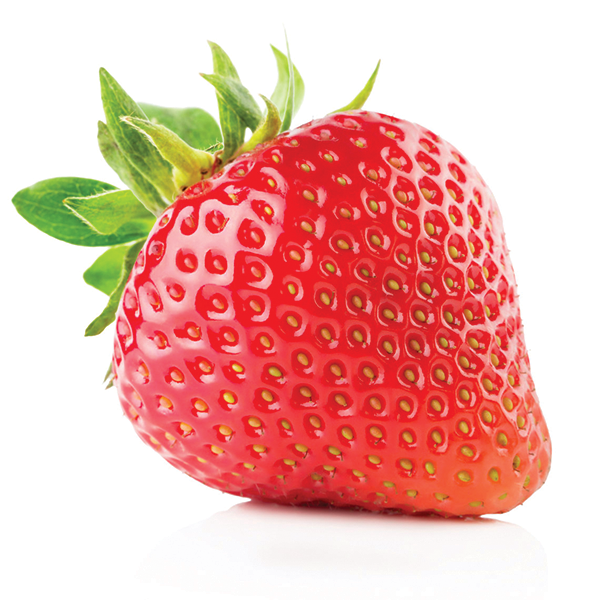


Evaluation time (1-image): 0.124s

daisy (score=0.94212)
tulips (score=0.03844)
roses (score=0.01617)
sunflowers (score=0.00306)
dandelion (score=0.00020)


In [0]:
display(Image(filename="strawberries_commodity-page.png", width=64, height=64))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=strawberries_commodity-page.png
